In [299]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sy
from datetime import datetime as dt 

from scipy.optimize import curve_fit

import pandas as pd  # data parsing library
from matplotlib import cm, colors

from glob import glob

from scipy.stats.stats import pearsonr

%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Display all data

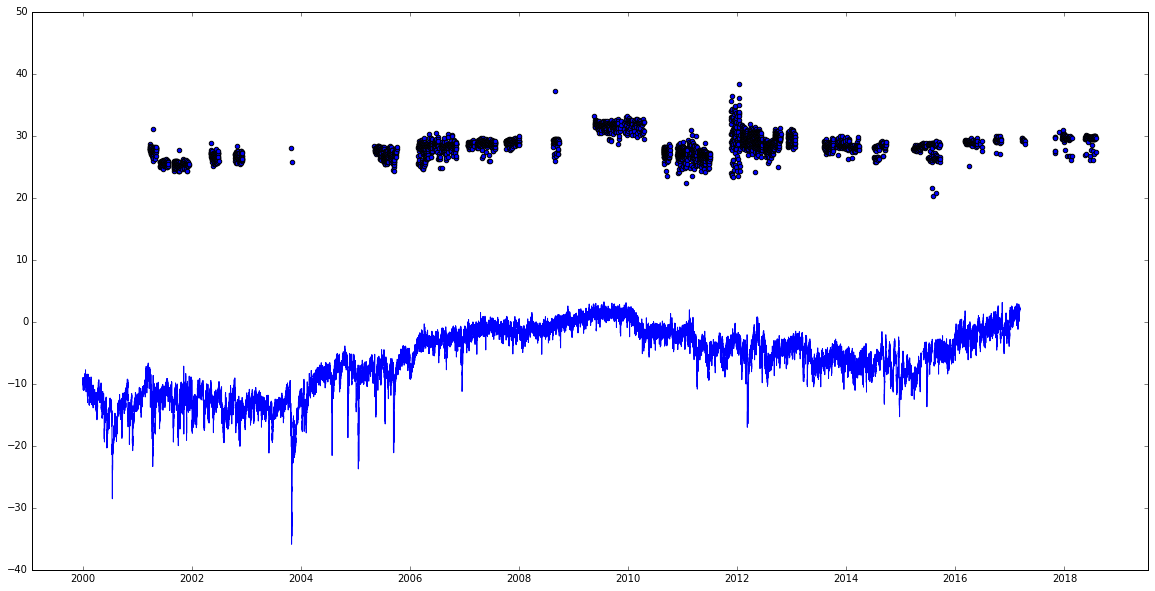

In [300]:
plt.figure(figsize=(20, 10))

df3 = pd.read_csv('./radiation_avg.csv', sep=',', header=0)#, parse_dates='time' 
df3['date'] = pd.to_datetime(df3['date'])
df3 = df3.set_index('date')
df3 = df3.sort_index()

df4 = pd.read_csv('./LSradiation.csv', sep=',', header=0)#, parse_dates='time')
df4['time'] = pd.to_datetime(df4['time'])
df4 = df4.set_index('time')
df4 = df4.sort_index()

plt.plot(df4.index,df4['FD']-100)
plt.scatter(df3.index,df3['count']*10)


# Display CR10 style data

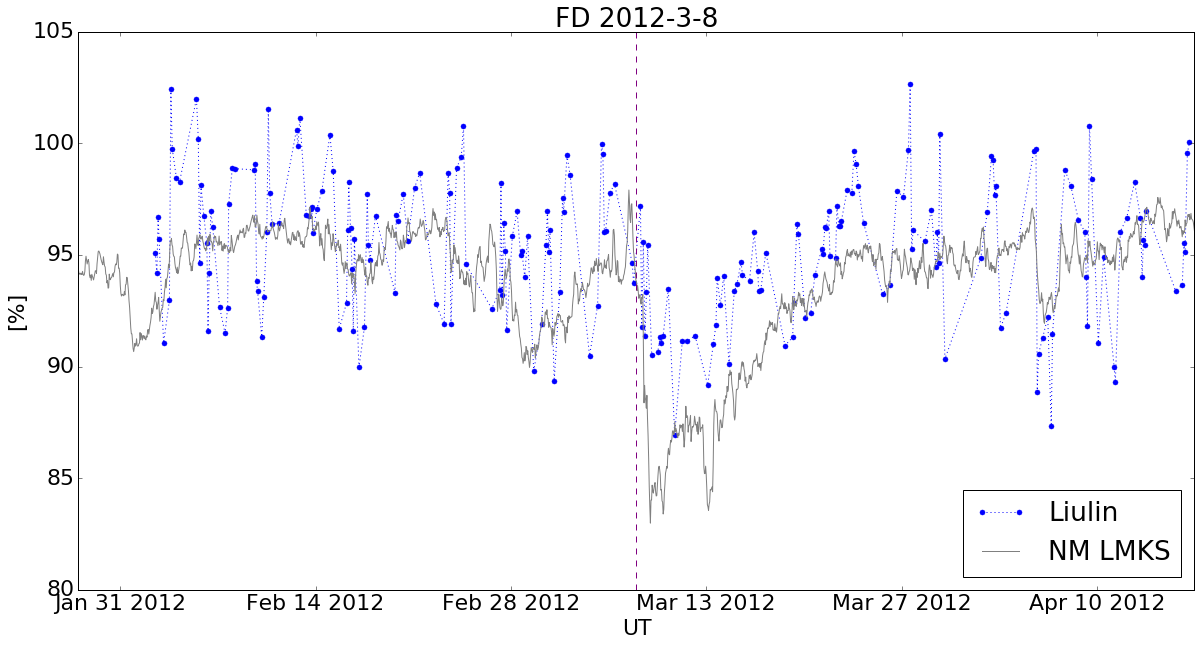

In [350]:
FD = '2001-4-12'
#FD = '2012-9-4'
#FD = '2007-6-22'
#FD = '2008-8-22'
#FD = '2005-9-10'
FD = '2012-3-8'

days_view = 40

plt.figure(figsize=(20, 10))
matplotlib.rcParams.update({'font.size': 22})

df3 = pd.read_csv('./LSradiation.csv', sep=',', header=0, parse_dates='time')
df3['time'] = pd.to_datetime(df3['time'])
df3 = df3.set_index('time')
df3 = df3.sort_index()

df2 = pd.read_csv('./radiation_avg.csv', sep=',', header=0, parse_dates='time' )
df2['date'] = pd.to_datetime(df2['date'])
df2 = df2.set_index('date')

#df2 = df2.loc[df2['counter']>30] # filter for short flights

datetime.timedelta(days=1)
from_time = str(pd.to_datetime(FD) + datetime.timedelta(days=-days_view))
to_time = str(pd.to_datetime(FD) + datetime.timedelta(days=days_view))

df2['c'] = df2['count'] / (3.1/100)
df2 = df2.loc[df2['c']<110]
plt.plot(df2[from_time: to_time].index,df2[from_time: to_time]['c'],lw='1', markersize=10,marker='.',linestyle=':',label='Liulin')
#plt.ylim(1.5,3.2)
#plt.annotate('s', (matplotlib.dates.date2num(df2[from_time: to_time].index.to_pydatetime()), df2[from_time: to_time]['c'].tolist()))

#plt.twinx()

# Neutron monitor
# The percentages are normalized to 100 % level reached in September 1986 and represented 1,745.200 counts per hour. 
plt.plot(df3[from_time: to_time].index,df3[from_time: to_time]['FD'],color='grey',label='NM LMKS')
plt.title('FD ' + FD) 

plt.axvline(x=pd.to_datetime(FD), color='purple', ls='--') # plot dashed vertical line at the FD time

plt.ylabel('[%]') # Y axis label
plt.xlabel('UT') # X axis label
plt.legend(loc=4)

# Plot map

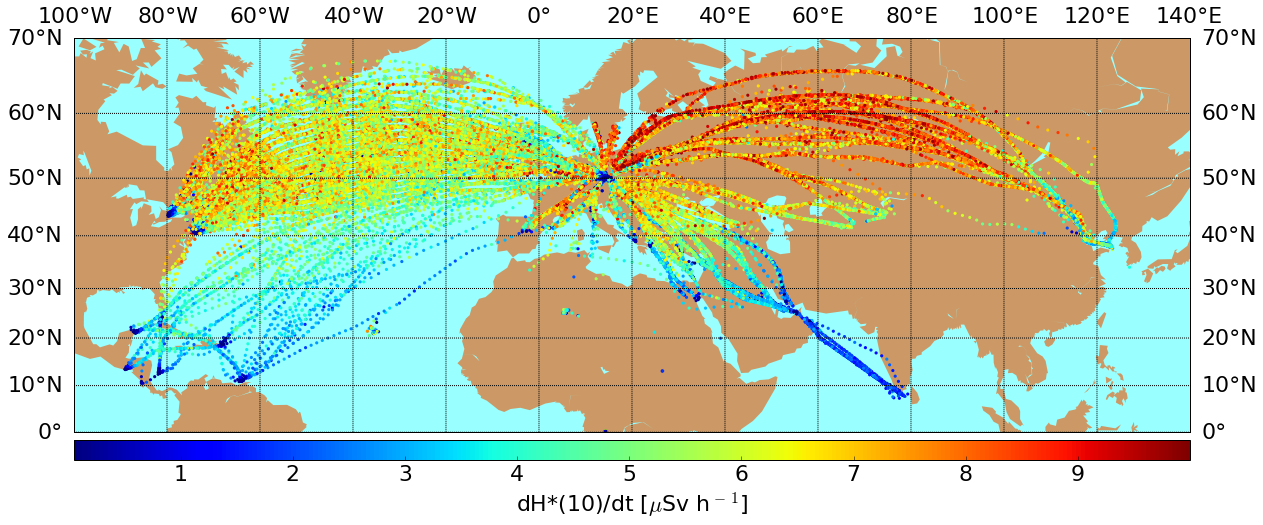

In [373]:
import time, calendar, datetime, numpy
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import urllib, os

def createColourbar(lwr, upr):
    """Create a colourbar with limits of lwr and upr"""
    cax, kw = matplotlib.colorbar.make_axes(mp.gca())
    norm = matplotlib.colors.Normalize(vmin = lwr, vmax = upr, clip = False)

    c = matplotlib.colorbar.ColorbarBase(cax, cmap=mp.spectral(), norm=norm)
    return c

plt.figure(figsize=(20,20))
matplotlib.rcParams.update({'font.size': 22})

# World map
m = Basemap(llcrnrlon=-100,llcrnrlat=0,urcrnrlon=140,urcrnrlat=70,projection='mill')

filename = './output/AllRun.txt'

df = pd.read_csv(filename,delimiter='\t', header=0, usecols=['date','lat','lon','alt','H'])
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')

df = df.resample('10 min', how='mean', base=0)
df.dropna(inplace=True)
df = df.loc[df['H']<10].loc[df['H']>0]
#df = df.loc['2010':'2011']
#df = df.loc['2010-07-01':'2011-07-01']
#df = df.loc[df['lat']<5].loc[df['lat']>0]
#df = df.loc[df['lon']<20].loc[df['lon']>0]
#df = df.loc[df['alt']>35000].loc[df['alt']<36000]

x, y = m(df['lon'].tolist(),df['lat'].tolist())

#m.drawcoastlines()
m.drawmapboundary(fill_color='#99ffff')
m.fillcontinents(color='#cc9966',lake_color='#99ffff',zorder=0)
m.drawparallels(np.arange(-90.,99.,10.),labels=[1,1,0,0])
m.drawmeridians(np.arange(-180.,180.,20.),labels=[0,0,1,0])
im1 = m.scatter(x,y,c=df['H'].tolist(),s=10,marker='o', linewidth='0', cmap='jet')

cb = m.colorbar(im1,"bottom", size="5%", pad="2%")
cb.set_label(r'dH*(10)/dt [$\mu$Sv h$^-$$^1$]')
plt.show()

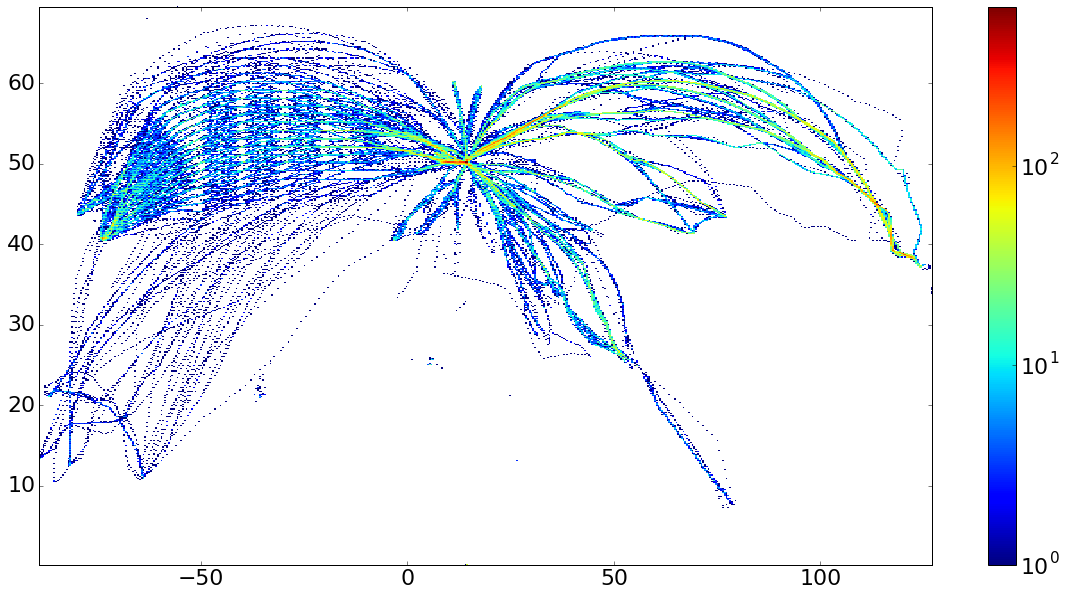

In [253]:
plt.figure(figsize=(20, 10))
matplotlib.rcParams.update({'font.size': 22})

df = pd.read_csv('./output/AllRun.txt',delimiter='\t', header=0, usecols=['date','lat','lon','alt','H'])
#df = df.loc[df['alt']>39000].loc[df['alt']<40000]

plt.hist2d(df['alt'], df['lat'], bins=(500,500), norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet)
plt.colorbar()

In [306]:
#df2.loc['2010-07-01':'2011-07-01']['count']*(1)

'\nB   business day frequency\nC   custom business day frequency (experimental)\nD   calendar day frequency\nW   weekly frequency\nM   month end frequency\nBM  business month end frequency\nMS  month start frequency\nBMS business month start frequency\nQ   quarter end frequency\nBQ  business quarter endfrequency\nQS  quarter start frequency\nBQS business quarter start frequency\nA   year end frequency\nBA  business year end frequency\nAS  year start frequency\nBAS business year start frequency\nH   hourly frequency\nT   minutely frequency\nS   secondly frequency\nL   milliseconds\nU   microseconds\n'

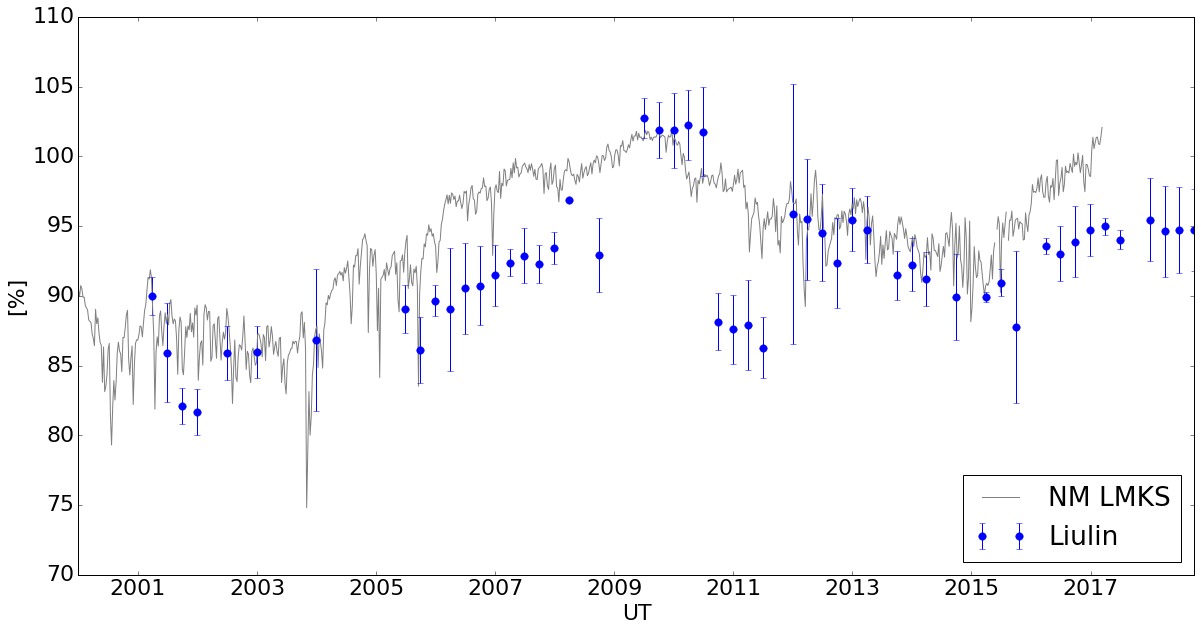

In [365]:
plt.figure(figsize=(20, 10))
matplotlib.rcParams.update({'font.size': 22})

FD = '2001-4-12'
#FD = '2012-9-4'
#FD = '2007-6-22'
#FD = '2008-8-22'
#FD = '2005-9-10'
#FD = '2015-8-4'

days_view = 20000

plt.figure(figsize=(20, 10))
matplotlib.rcParams.update({'font.size': 22})

df3 = pd.read_csv('./LSradiation.csv', sep=',', header=0, parse_dates='time')
df3['time'] = pd.to_datetime(df3['time'])
df3 = df3.set_index('time')
df3 = df3.sort_index()

df2 = pd.read_csv('./radiation_avg.csv', sep=',', header=0, parse_dates='time' )
df2['date'] = pd.to_datetime(df2['date'])
df2 = df2.set_index('date')

#df2 = df2.loc[df2['counter']>30] # filter for long flights

datetime.timedelta(days=1)
from_time = str(pd.to_datetime(FD) + datetime.timedelta(days=-days_view))
to_time = str(pd.to_datetime(FD) + datetime.timedelta(days=days_view))

# Neutron monitor
# The percentages are normalized to 100 % level reached in September 1986 and represented 1,745.200 counts per hour. 
df3 = df3.resample('W', how='mean')

plt.plot(df3[from_time: to_time].index,df3[from_time: to_time]['FD'],color='grey',label='NM LMKS')

#Liulin
df2['c'] = df2['count'] / (3.1/100)
df2 = df2.loc[df2['c']<110]
#df2 = df2.loc[df2['alt']>34000]


df4 = df2.resample('Q', how='mean')
df5 = df2.resample('Q', how=np.std)

#df4 = df4.loc['2010-07-01':'2011-07-01']
#df5 = df5.loc['2010-07-01':'2011-07-01']

plt.errorbar(df4[from_time: to_time].index,df4[from_time: to_time]['c'], yerr=df5[from_time: to_time]['c'], lw='1', markersize=15,marker='.',linestyle='',label='Liulin')
#plt.ylim(70,110)
#plt.annotate('s', (matplotlib.dates.date2num(df2[from_time: to_time].index.to_pydatetime()), df2[from_time: to_time]['c'].tolist()))
#plt.plot(df5[from_time: to_time].index,df5[from_time: to_time]['c'],lw='1', markersize=10,marker='o',linestyle=':',label='Liulin')
#plt.errorbar(x, y, xerr=0.2, yerr=0.4)

plt.ylabel('[%]') # Y axis label
plt.xlabel('UT') # X axis label
plt.legend(loc=4)

'''
B   business day frequency
C   custom business day frequency (experimental)
D   calendar day frequency
W   weekly frequency
M   month end frequency
BM  business month end frequency
MS  month start frequency
BMS business month start frequency
Q   quarter end frequency
BQ  business quarter endfrequency
QS  quarter start frequency
BQS business quarter start frequency
A   year end frequency
BA  business year end frequency
AS  year start frequency
BAS business year start frequency
H   hourly frequency
T   minutely frequency
S   secondly frequency
L   milliseconds
U   microseconds
'''


In [371]:
df = pd.read_csv('./radiation_avg.csv', sep=',', header=0, parse_dates='time' )
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')

df.loc['2010-07-01':'2010-08-26 22:00']

,Unnamed: 0,alt,lat,count,counter
date,,,,,
2010-08-25 10:50:00,1966,38992.888889,55.070256,2.825390,9
2010-08-25 13:40:00,1967,37975.636364,54.477327,2.722223,11
2010-08-25 18:00:00,1968,36004.000000,47.336300,2.772788,1
2010-08-26 00:35:00,1969,39466.000000,45.800264,2.703805,50
2010-08-26 08:45:00,1970,36925.491525,46.605563,2.741779,59
2010-08-26 12:15:00,1971,37982.222222,50.782178,2.799323,9
2010-08-26 15:50:00,1972,38974.000000,50.251300,2.822408,4
